In [4]:
import requests
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.stats import linregress
from pprint import pprint
import statsmodels.api as sm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
from scipy import stats
from sklearn.linear_model import LinearRegression
import sklearn.linear_model

In [5]:
csvpath = "./final_dataframe.csv"

In [7]:
omni_df = pd.read_csv(csvpath)
omni_df

,FIPS,% Adults with Obesity,% Physically Inactive,% With Access to Exercise Opportunities,Primary Care Physicians Rate,High School Graduation Rate,% Unemployed,County and State,Median Income,State,County
0,1001,33,35,69.0,45.0,90.0,3.6,"Autauga County, Alabama",58786,Alabama,Autauga County
1,1003,31,27,74.0,73.0,86.0,3.6,"Baldwin County, Alabama",55962,Alabama,Baldwin County
2,1005,42,24,53.0,32.0,81.0,5.2,"Barbour County, Alabama",34186,Alabama,Barbour County
3,1007,38,34,16.0,49.0,84.0,4.0,"Bibb County, Alabama",45340,Alabama,Bibb County
4,1009,34,30,16.0,22.0,93.0,3.5,"Blount County, Alabama",48695,Alabama,Blount County
...,...,...,...,...,...,...,...,...,...,...,...
2909,56037,30,25,90.0,37.0,81.0,4.2,"Sweetwater County, Wyoming",73008,Wyoming,Sweetwater County
2910,56039,12,12,100.0,116.0,88.0,3.0,"Teton County, Wyoming",83831,Wyoming,Teton County
2911,56041,36,27,84.0,44.0,85.0,4.4,"Uinta County, Wyoming",58235,Wyoming,Uinta County
2912,56043,29,28,83.0,50.0,85.0,4.2,"Washakie County, Wyoming",53426,Wyoming,Washakie County


omni_df

In [9]:
sample_df = omni_df.loc[(omni_df["State"]==" California") | (omni_df["State"]==" Texas") | (omni_df["State"]==" Florida") ]
sample_df

,FIPS,% Adults with Obesity,% Physically Inactive,% With Access to Exercise Opportunities,Primary Care Physicians Rate,High School Graduation Rate,% Unemployed,County and State,Median Income,State,County
173,6001,19,15,100.0,110.0,87.0,3.0,"Alameda County, California",92574,California,Alameda County
174,6005,30,25,76.0,67.0,88.0,4.0,"Amador County, California",61198,California,Amador County
175,6007,27,22,84.0,61.0,85.0,5.0,"Butte County, California",48443,California,Butte County
176,6009,31,31,60.0,44.0,90.0,4.0,"Calaveras County, California",58151,California,Calaveras County
177,6011,41,28,75.0,32.0,89.0,12.9,"Colusa County, California",56704,California,Colusa County
...,...,...,...,...,...,...,...,...,...,...,...
2557,48499,28,32,39.0,47.0,95.0,4.2,"Wood County, Texas",48534,Texas,Wood County
2558,48501,33,28,67.0,35.0,98.0,2.8,"Yoakum County, Texas",68814,Texas,Yoakum County
2559,48503,34,29,60.0,67.0,97.0,3.2,"Young County, Texas",47194,Texas,Young County
2560,48505,31,20,45.0,7.0,90.0,5.6,"Zapata County, Texas",31113,Texas,Zapata County


In [10]:
sample_df.to_csv("modelling_data.csv",index=False)

# OMNIBUS MODELS

## The omnibus model tests all the proposed predictors together to see which ones would best be part of a "best fit" model. For the omnibus model, only data from California, Texas, and Florida will be used 

## This section considers three models: 
### 1. The Overall model tests all predictors to see how all proposed predictors will work together. 
### 2. The Economic-Demographic model tests only economic predictors (e.g. Median Income) and demographic predictors (e.g. high school graduation rate)
### 3. The ealth model tests only health policy predictors (e,g. physical inactivity, Access to care)

### All three models will be compared to select the predictors for the best fit model

## OVERALL MODEL

In [12]:
sample_df

,FIPS,% Adults with Obesity,% Physically Inactive,% With Access to Exercise Opportunities,Primary Care Physicians Rate,High School Graduation Rate,% Unemployed,County and State,Median Income,State,County
173,6001,19,15,100.0,110.0,87.0,3.0,"Alameda County, California",92574,California,Alameda County
174,6005,30,25,76.0,67.0,88.0,4.0,"Amador County, California",61198,California,Amador County
175,6007,27,22,84.0,61.0,85.0,5.0,"Butte County, California",48443,California,Butte County
176,6009,31,31,60.0,44.0,90.0,4.0,"Calaveras County, California",58151,California,Calaveras County
177,6011,41,28,75.0,32.0,89.0,12.9,"Colusa County, California",56704,California,Colusa County
...,...,...,...,...,...,...,...,...,...,...,...
2557,48499,28,32,39.0,47.0,95.0,4.2,"Wood County, Texas",48534,Texas,Wood County
2558,48501,33,28,67.0,35.0,98.0,2.8,"Yoakum County, Texas",68814,Texas,Yoakum County
2559,48503,34,29,60.0,67.0,97.0,3.2,"Young County, Texas",47194,Texas,Young County
2560,48505,31,20,45.0,7.0,90.0,5.6,"Zapata County, Texas",31113,Texas,Zapata County


In [14]:
X = sample_df[['% With Access to Exercise Opportunities', '% Physically Inactive' ,'High School Graduation Rate',  'Median Income', 'Primary Care Physicians Rate', '% Unemployed']].astype(float)
Y = sample_df['% Adults with Obesity'].astype(float)
X

,% With Access to Exercise Opportunities,% Physically Inactive,High School Graduation Rate,Median Income,Primary Care Physicians Rate,% Unemployed
173,100.0,15.0,87.0,92574.0,110.0,3.0
174,76.0,25.0,88.0,61198.0,67.0,4.0
175,84.0,22.0,85.0,48443.0,61.0,5.0
176,60.0,31.0,90.0,58151.0,44.0,4.0
177,75.0,28.0,89.0,56704.0,32.0,12.9
...,...,...,...,...,...,...
2557,39.0,32.0,95.0,48534.0,47.0,4.2
2558,67.0,28.0,98.0,68814.0,35.0,2.8
2559,60.0,29.0,97.0,47194.0,67.0,3.2
2560,45.0,20.0,90.0,31113.0,7.0,5.6


In [15]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 14.145343337709765
Coefficients: 
 [ 7.09110354e-03  5.26867058e-01  5.41385799e-03 -8.44446062e-07
 -2.36631532e-02  6.27483900e-01]


In [16]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
predictions

173     22.687505
174     29.308174
175     27.882167
176     33.269645
177     39.326733
          ...    
2557    33.742135
2558    31.638961
2559    31.220219
2560    27.129015
2561    30.751688
Length: 354, dtype: float64

In [17]:
print_model = model.summary()
print(print_model)

                                  OLS Regression Results                                  
Dep. Variable:     % Adults with Obesity   R-squared (uncentered):                   0.980
Model:                               OLS   Adj. R-squared (uncentered):              0.980
Method:                    Least Squares   F-statistic:                              2886.
Date:                   Fri, 27 Nov 2020   Prob (F-statistic):                   2.58e-293
Time:                           14:26:43   Log-Likelihood:                         -1025.5
No. Observations:                    354   AIC:                                      2063.
Df Residuals:                        348   BIC:                                      2086.
Df Model:                              6                                                  
Covariance Type:               nonrobust                                                  
                                              coef    std err          t      P>|t|      [

In [ ]:
#Overall Model: Analysi f the overall model suggests a multicollinearity problem. This means that at least some of the predictors are intercorrelated and should not be used as predictors in the same model. The Multiple R is .980; which means thataround 98 percent of the variance in obesity rates in the sample data is explained/predicted by variations in the
# 7 predictors in this model. However, the F-ratio is infinitessimally low, which suggests that this model has very low generalizability. 
# The small coefficient for each predictor in the model is likely a product of chance. The overall model is unsuitable for further analysis; but it does suggest unemployment rate and physical inactivity play a bigger role in obesity rates than the other predictors, 

## Economic and Demograhic Model

## Model 1: All Economic/ Demographic Predictors 

In [18]:
sample_df

,FIPS,% Adults with Obesity,% Physically Inactive,% With Access to Exercise Opportunities,Primary Care Physicians Rate,High School Graduation Rate,% Unemployed,County and State,Median Income,State,County
173,6001,19,15,100.0,110.0,87.0,3.0,"Alameda County, California",92574,California,Alameda County
174,6005,30,25,76.0,67.0,88.0,4.0,"Amador County, California",61198,California,Amador County
175,6007,27,22,84.0,61.0,85.0,5.0,"Butte County, California",48443,California,Butte County
176,6009,31,31,60.0,44.0,90.0,4.0,"Calaveras County, California",58151,California,Calaveras County
177,6011,41,28,75.0,32.0,89.0,12.9,"Colusa County, California",56704,California,Colusa County
...,...,...,...,...,...,...,...,...,...,...,...
2557,48499,28,32,39.0,47.0,95.0,4.2,"Wood County, Texas",48534,Texas,Wood County
2558,48501,33,28,67.0,35.0,98.0,2.8,"Yoakum County, Texas",68814,Texas,Yoakum County
2559,48503,34,29,60.0,67.0,97.0,3.2,"Young County, Texas",47194,Texas,Young County
2560,48505,31,20,45.0,7.0,90.0,5.6,"Zapata County, Texas",31113,Texas,Zapata County


In [19]:
X = sample_df[['High School Graduation Rate',  'Median Income', '% Unemployed']].astype(float)
Y = sample_df['% Adults with Obesity'].astype(float)
X

,High School Graduation Rate,Median Income,% Unemployed
173,87.0,92574.0,3.0
174,88.0,61198.0,4.0
175,85.0,48443.0,5.0
176,90.0,58151.0,4.0
177,89.0,56704.0,12.9
...,...,...,...
2557,95.0,48534.0,4.2
2558,98.0,68814.0,2.8
2559,97.0,47194.0,3.2
2560,90.0,31113.0,5.6


In [20]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 31.780954939908327
Coefficients: 
 [ 3.62534257e-02 -1.24641369e-04  5.78210321e-01]


In [21]:
X = sm.add_constant(X) 
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
predictions

173     25.131084
174     29.656295
175     31.715546
176     30.108584
177     35.398759
          ...    
2557    31.604170
2558    28.375708
2559    31.265486
2560    34.403774
2561    36.746881
Length: 354, dtype: float64

In [22]:
print_model = model.summary()
print(print_model)

                              OLS Regression Results                             
Dep. Variable:     % Adults with Obesity   R-squared:                       0.155
Model:                               OLS   Adj. R-squared:                  0.148
Method:                    Least Squares   F-statistic:                     21.41
Date:                   Fri, 27 Nov 2020   Prob (F-statistic):           9.33e-13
Time:                           14:54:55   Log-Likelihood:                -1080.2
No. Observations:                    354   AIC:                             2168.
Df Residuals:                        350   BIC:                             2184.
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [24]:
# The Economic/Demographic Model has a multiple R of 0.155, which is small
# Economic/deographix variables account for only 15.5 percent of variabiliy in obesity rates in the dataset. 
# The model retains the multicollinearity issues of the overall model; but it has a respectable F-ratio of 21.41, this suggests that the model is 
# imrobable and the coefficients produced for the predictors are unlikely to be products of chance. This model predicts that a county with a high school graduation rate of zero, a median income of zero, and virtually no unemployment would, on average have an obesity rate of 31.78%
# IF THE OTHER PREDICTORS IN THE MODEL ARE HELD CONSTANT, a county would be expected to report a 0.5782 percent higher obesity rate for every percentage point in its poverty rate,

## Model 2: Model without Median Income

### Theoretically speaking, we would expect a county's median income to be correlated with its unemployment rate ad high school graduation rate. This could account for the multicollinearity model so a second model with median income dropped as a predictor is tested.  

In [29]:
X = sample_df[['High School Graduation Rate', '% Unemployed']].astype(float)
Y = sample_df['% Adults with Obesity'].astype(float)
X

,High School Graduation Rate,% Unemployed
173,87.0,3.0
174,88.0,4.0
175,85.0,5.0
176,90.0,4.0
177,89.0,12.9
...,...,...
2557,95.0,4.2
2558,98.0,2.8
2559,97.0,3.2
2560,90.0,5.6


In [35]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
print("Equation: y = {:.2f} + {:.2f}x1 + {:.2f}x2".format(regr.intercept_, regr.coef_[0],
                                                         regr.coef_[1]))

Intercept: 
 24.023718859551114
Coefficients: 
 [0.         0.03321239 0.91639033]
Equation: y = 24.02 + 0.00x1 + 0.03x2


In [31]:
X = sm.add_constant(X) 
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
predictions

173     29.662368
174     30.611971
175     31.428724
176     30.678395
177     38.801057
          ...    
2557    31.027735
2558    29.844426
2559    30.177770
2560    32.144620
2561    35.784967
Length: 354, dtype: float64

In [32]:
print_model = model.summary()
print(print_model)

                              OLS Regression Results                             
Dep. Variable:     % Adults with Obesity   R-squared:                       0.067
Model:                               OLS   Adj. R-squared:                  0.062
Method:                    Least Squares   F-statistic:                     12.67
Date:                   Fri, 27 Nov 2020   Prob (F-statistic):           4.86e-06
Time:                           15:53:29   Log-Likelihood:                -1097.7
No. Observations:                    354   AIC:                             2201.
Df Residuals:                        351   BIC:                             2213.
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

<!-- Model 2 solves a few issues from Model 1: 
    1. It resolves the ulticollinearity problemThe multiple R for Model 
    2. The removal of median income greatly improves the predictive contributions of the remaining two predictors. 

However, this also comes with some caveats: 
    1. The multiple R for Model 2 (0.067) is smaller tha for Model 1. 
    2. The F-ratio is also smaller; but still significant.Model 2 appears to sacrifice a lot of 

Equation: y = 18.02 + 0.51x1 + -0.01x2


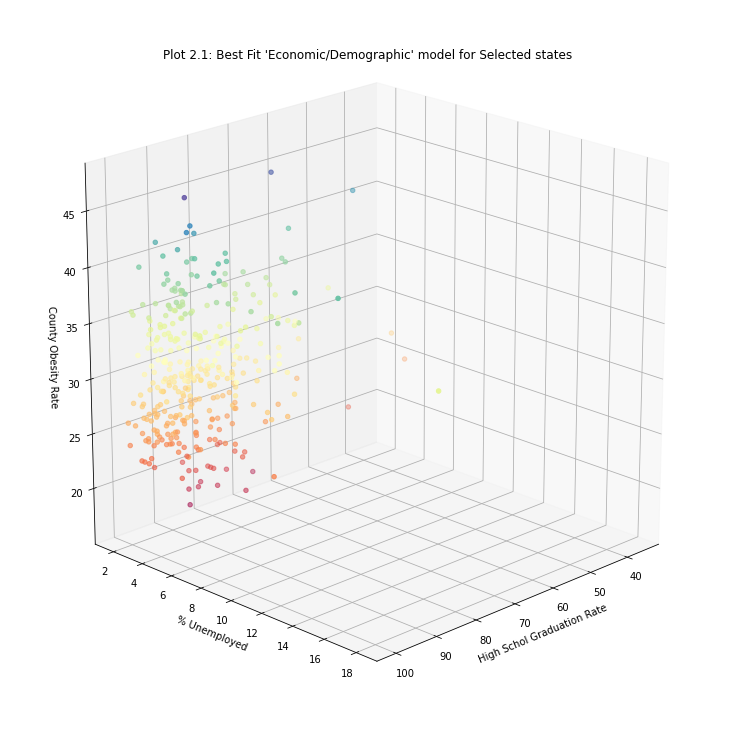

In [110]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(10, 10))
axes = Axes3D(fig, elev=20, azim=45)
axes.scatter(sample_df["High School Graduation Rate"], sample_df["% Unemployed"], sample_df['% Adults with Obesity'], c=sample_df['% Adults with Obesity'], cmap=plt.cm.get_cmap("Spectral"))
plt.title("Plot 2.1: Best Fit 'Economic/Demographic' model for Selected states")
axes.set_xlabel("High Schol Graduation Rate")
axes.set_ylabel("% Unemployed")
axes.set_zlabel("County Obesity Rate")
print("Equation: y = {:.2f} + {:.2f}x1 + {:.2f}x2".format(regr.intercept_, regr.coef_[0],
                                                         regr.coef_[1]))
plt.savefig("Plot 2-1.png")
plt.show()

## Health Factors Models

## Model 1: All health factor predictors

In [25]:
X = sample_df[['% With Access to Exercise Opportunities', '% Physically Inactive' , 'Primary Care Physicians Rate']].astype(float)
Y = sample_df['% Adults with Obesity'].astype(float)
X

,% With Access to Exercise Opportunities,% Physically Inactive,Primary Care Physicians Rate
173,100.0,15.0,110.0
174,76.0,25.0,67.0
175,84.0,22.0,61.0
176,60.0,31.0,44.0
177,75.0,28.0,32.0
...,...,...,...
2557,39.0,32.0,47.0
2558,67.0,28.0,35.0
2559,60.0,29.0,67.0
2560,45.0,20.0,7.0


In [26]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 16.86516021279717
Coefficients: 
 [ 0.01210807  0.53872704 -0.03122865]


In [27]:
X = sm.add_constant(X) 
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
predictions

173     22.721721
174     29.161230
175     27.829285
176     32.918122
177     31.858306
          ...    
2557    33.108893
2558    31.667755
2559    31.122409
2560    27.965964
2561    27.823190
Length: 354, dtype: float64

In [28]:
print_model = model.summary()
print(print_model)

                              OLS Regression Results                             
Dep. Variable:     % Adults with Obesity   R-squared:                       0.378
Model:                               OLS   Adj. R-squared:                  0.373
Method:                    Least Squares   F-statistic:                     71.02
Date:                   Fri, 27 Nov 2020   Prob (F-statistic):           6.78e-36
Time:                           15:40:30   Log-Likelihood:                -1025.9
No. Observations:                    354   AIC:                             2060.
Df Residuals:                        350   BIC:                             2075.
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [ ]:
# The all-health factors model has a respectable multiple R of 0.378 and explains 37.8 percent of the variability in obesity rates in the current dataset. 
# In addition, this model reports a good F-ratio of 71.02 which would almost certainly be statistically sgnificant and not  a product of chance. As for the predictors, access to exercise oppurtunities, while it has a substantial contribution to the model, does not appear to be statistically significant. 
# It appears that Physical inactivity is the best predictor from this model. 

# BestFit Models

## The following best fit models test the best predictors from the previous models in various combinations in order to build a model that best predicts obesity rates across all US counties. 

## Best Fit model 1:  Median Income and Rate of Inactivity

In [37]:
sample_df

,FIPS,% Adults with Obesity,% Physically Inactive,% With Access to Exercise Opportunities,Primary Care Physicians Rate,High School Graduation Rate,% Unemployed,County and State,Median Income,State,County
173,6001,19,15,100.0,110.0,87.0,3.0,"Alameda County, California",92574,California,Alameda County
174,6005,30,25,76.0,67.0,88.0,4.0,"Amador County, California",61198,California,Amador County
175,6007,27,22,84.0,61.0,85.0,5.0,"Butte County, California",48443,California,Butte County
176,6009,31,31,60.0,44.0,90.0,4.0,"Calaveras County, California",58151,California,Calaveras County
177,6011,41,28,75.0,32.0,89.0,12.9,"Colusa County, California",56704,California,Colusa County
...,...,...,...,...,...,...,...,...,...,...,...
2557,48499,28,32,39.0,47.0,95.0,4.2,"Wood County, Texas",48534,Texas,Wood County
2558,48501,33,28,67.0,35.0,98.0,2.8,"Yoakum County, Texas",68814,Texas,Yoakum County
2559,48503,34,29,60.0,67.0,97.0,3.2,"Young County, Texas",47194,Texas,Young County
2560,48505,31,20,45.0,7.0,90.0,5.6,"Zapata County, Texas",31113,Texas,Zapata County


In [53]:
X = sample_df[['Median Income','% Physically Inactive']].astype(float)
Y = sample_df['% Adults with Obesity'].astype(float)
X

,Median Income,% Physically Inactive
173,92574.0,15.0
174,61198.0,25.0
175,48443.0,22.0
176,58151.0,31.0
177,56704.0,28.0
...,...,...
2557,48534.0,32.0
2558,68814.0,28.0
2559,47194.0,29.0
2560,31113.0,20.0


In [54]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 18.144227123745708
Coefficients: 
 [-3.73077877e-05  5.38647337e-01]


In [55]:
X = sm.add_constant(X) 
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
predictions

173     22.770206
174     29.327249
175     28.187167
176     32.672809
177     31.110852
          ...    
2557    33.570246
2558    30.659054
2559    32.004296
2560    27.756417
2561    27.761080
Length: 354, dtype: float64

In [56]:
print_model = model.summary()
print(print_model)

                              OLS Regression Results                             
Dep. Variable:     % Adults with Obesity   R-squared:                       0.368
Model:                               OLS   Adj. R-squared:                  0.364
Method:                    Least Squares   F-statistic:                     102.1
Date:                   Fri, 27 Nov 2020   Prob (F-statistic):           1.14e-35
Time:                           17:57:42   Log-Likelihood:                -1028.9
No. Observations:                    354   AIC:                             2064.
Df Residuals:                        351   BIC:                             2075.
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


Equation: y = 18.02 + 0.51x1 + -0.01x2


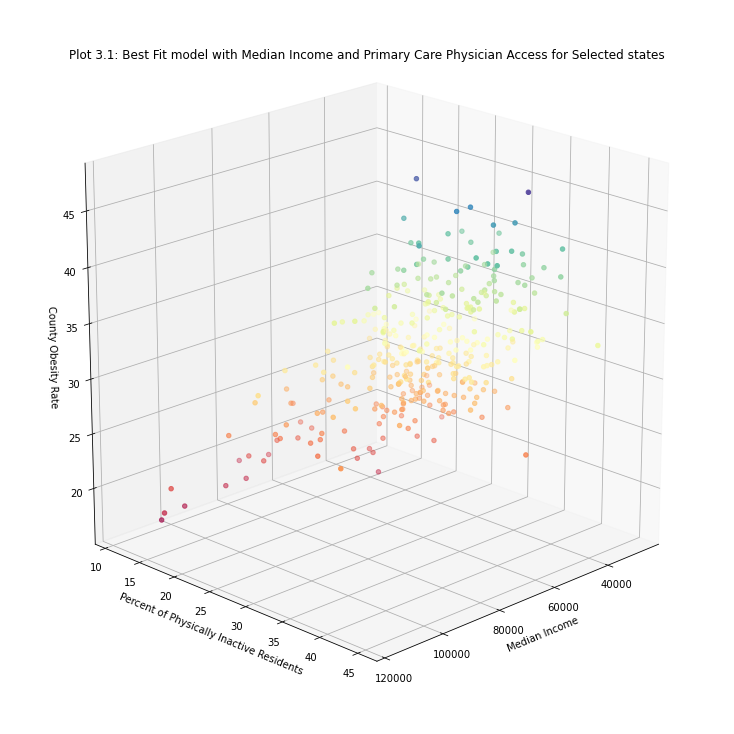

In [111]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(10, 10))
axes = Axes3D(fig, elev=20, azim=45)
axes.scatter(sample_df["Median Income"], sample_df["% Physically Inactive"], sample_df['% Adults with Obesity'], c=sample_df['% Adults with Obesity'], cmap=plt.cm.get_cmap("Spectral"))
plt.title("Plot 3.1: Best Fit model with Median Income and Primary Care Physician Access for Selected states")
axes.set_xlabel("Median Income")
axes.set_ylabel("Percent of Physically Inactive Residents")
axes.set_zlabel("County Obesity Rate")
print("Equation: y = {:.2f} + {:.2f}x1 + {:.2f}x2".format(regr.intercept_, regr.coef_[0], regr.coef_[1]))
plt.savefig("Plot 3-1.png")                                                       
plt.show()

## Best Fit model 2: High School Graduation Rate and Access to Primary Care Physicians

In [58]:
sample_df

,FIPS,% Adults with Obesity,% Physically Inactive,% With Access to Exercise Opportunities,Primary Care Physicians Rate,High School Graduation Rate,% Unemployed,County and State,Median Income,State,County
173,6001,19,15,100.0,110.0,87.0,3.0,"Alameda County, California",92574,California,Alameda County
174,6005,30,25,76.0,67.0,88.0,4.0,"Amador County, California",61198,California,Amador County
175,6007,27,22,84.0,61.0,85.0,5.0,"Butte County, California",48443,California,Butte County
176,6009,31,31,60.0,44.0,90.0,4.0,"Calaveras County, California",58151,California,Calaveras County
177,6011,41,28,75.0,32.0,89.0,12.9,"Colusa County, California",56704,California,Colusa County
...,...,...,...,...,...,...,...,...,...,...,...
2557,48499,28,32,39.0,47.0,95.0,4.2,"Wood County, Texas",48534,Texas,Wood County
2558,48501,33,28,67.0,35.0,98.0,2.8,"Yoakum County, Texas",68814,Texas,Yoakum County
2559,48503,34,29,60.0,67.0,97.0,3.2,"Young County, Texas",47194,Texas,Young County
2560,48505,31,20,45.0,7.0,90.0,5.6,"Zapata County, Texas",31113,Texas,Zapata County


In [59]:
X = sample_df[['Primary Care Physicians Rate','High School Graduation Rate']].astype(float)
Y = sample_df['% Adults with Obesity'].astype(float)
X

,Primary Care Physicians Rate,High School Graduation Rate
173,110.0,87.0
174,67.0,88.0
175,61.0,85.0
176,44.0,90.0
177,32.0,89.0
...,...,...
2557,47.0,95.0
2558,35.0,98.0
2559,67.0,97.0
2560,7.0,90.0


In [60]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 36.877158746888725
Coefficients: 
 [-0.06993994 -0.03134912]


In [61]:
X = sm.add_constant(X) 
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
predictions

173     26.456391
174     29.432460
175     29.946147
176     30.978380
177     31.849009
          ...    
2557    30.611815
2558    31.357047
2559    29.150318
2560    33.566158
2561    32.804061
Length: 354, dtype: float64

In [62]:
print_model = model.summary()
print(print_model)

                              OLS Regression Results                             
Dep. Variable:     % Adults with Obesity   R-squared:                       0.126
Model:                               OLS   Adj. R-squared:                  0.121
Method:                    Least Squares   F-statistic:                     25.31
Date:                   Fri, 27 Nov 2020   Prob (F-statistic):           5.38e-11
Time:                           18:19:07   Log-Likelihood:                -1086.2
No. Observations:                    354   AIC:                             2178.
Df Residuals:                        351   BIC:                             2190.
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

Equation: y = 18.02 + 0.51x1 + -0.01x2


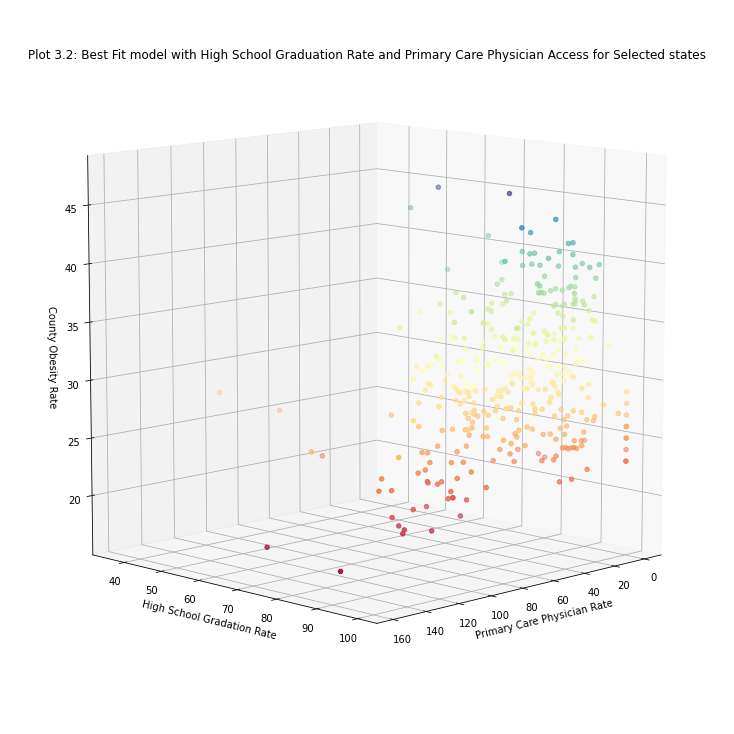

In [112]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(10, 10))
axes = Axes3D(fig, elev=10, azim=45)
axes.scatter(sample_df["Primary Care Physicians Rate"], sample_df["High School Graduation Rate"], sample_df['% Adults with Obesity'], c=sample_df['% Adults with Obesity'], cmap=plt.cm.get_cmap("Spectral"))
plt.title("Plot 3.2: Best Fit model with High School Graduation Rate and Primary Care Physician Access for Selected states")
axes.set_xlabel("Primary Care Physician Rate")
axes.set_ylabel("High School Gradation Rate")
axes.set_zlabel("County Obesity Rate")
print("Equation: y = {:.2f} + {:.2f}x1 + {:.2f}x2".format(regr.intercept_, regr.coef_[0],
                                                         regr.coef_[1]))
plt.savefig("Plot 3-2.png")
plt.show()

## Best fit Model 3:  Physical Inactivity and Unemployment

In [67]:
X = sample_df[['% Physically Inactive','% Unemployed']].astype(float)
Y = sample_df['% Adults with Obesity'].astype(float)
X

,% Physically Inactive,% Unemployed
173,15.0,3.0
174,25.0,4.0
175,22.0,5.0
176,31.0,4.0
177,28.0,12.9
...,...,...
2557,32.0,4.2
2558,28.0,2.8
2559,29.0,3.2
2560,20.0,5.6


In [68]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 12.726300649964742
Coefficients: 
 [0.56245354 0.68160963]


In [69]:
X = sm.add_constant(X) 
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
predictions

173     23.207933
174     29.514078
175     28.508327
176     32.888799
177     37.267764
          ...    
2557    33.587574
2558    30.383507
2559    31.218604
2560    27.792385
2561    30.450663
Length: 354, dtype: float64

In [70]:
print_model = model.summary()
print(print_model)

                              OLS Regression Results                             
Dep. Variable:     % Adults with Obesity   R-squared:                       0.398
Model:                               OLS   Adj. R-squared:                  0.395
Method:                    Least Squares   F-statistic:                     116.1
Date:                   Fri, 27 Nov 2020   Prob (F-statistic):           2.00e-39
Time:                           18:36:54   Log-Likelihood:                -1020.2
No. Observations:                    354   AIC:                             2046.
Df Residuals:                        351   BIC:                             2058.
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


Equation: y = 18.02 + 0.51x1 + -0.01x2


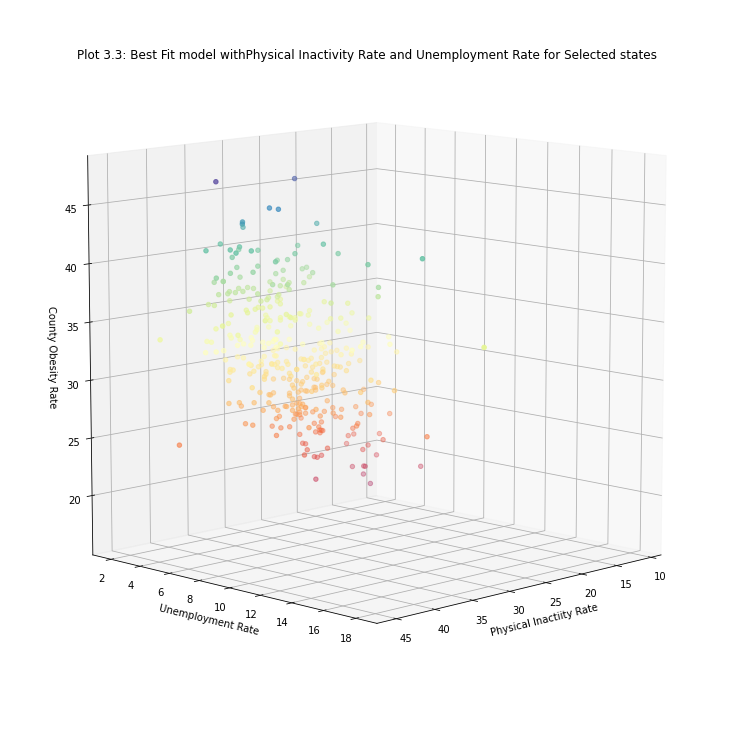

In [113]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(10, 10))
axes = Axes3D(fig, elev=10, azim=45)
axes.scatter(sample_df['% Physically Inactive'], sample_df['% Unemployed'], sample_df['% Adults with Obesity'], c=sample_df['% Adults with Obesity'], cmap=plt.cm.get_cmap("Spectral"))
plt.title("Plot 3.3: Best Fit model withPhysical Inactivity Rate and Unemployment Rate for Selected states")
axes.set_xlabel("Physical Inactiity Rate")
axes.set_ylabel("Unemployment Rate")
axes.set_zlabel("County Obesity Rate")
print("Equation: y = {:.2f} + {:.2f}x1 + {:.2f}x2".format(regr.intercept_, regr.coef_[0],
                                                         regr.coef_[1]))
plt.savefig("Plot 3-3.png")
plt.show()

# COMPLEX MODELS

## More Complex models of 3 or more predictors will be tested for best fit on a sample of selected states. 

## Model 1: 3 predictors: physical inactivity, education, unemployment

In [74]:
X = sample_df[[ '% Physically Inactive' ,'High School Graduation Rate','% Unemployed']].astype(float)
Y = sample_df['% Adults with Obesity'].astype(float)
X

,% Physically Inactive,High School Graduation Rate,% Unemployed
173,15.0,87.0,3.0
174,25.0,88.0,4.0
175,22.0,85.0,5.0
176,31.0,90.0,4.0
177,28.0,89.0,12.9
...,...,...,...
2557,32.0,95.0,4.2
2558,28.0,98.0,2.8
2559,29.0,97.0,3.2
2560,20.0,90.0,5.6


In [75]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 11.189828802214443
Coefficients: 
 [0.5612275  0.01698287 0.6939207 ]


In [76]:
X = sm.add_constant(X) 
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
predictions

173     23.167513
174     29.490692
175     28.449981
176     32.892022
177     37.367251
          ...    
2557    33.676948
2558    30.511498
2559    31.333311
2560    27.828793
2561    30.569049
Length: 354, dtype: float64

In [77]:
print_model = model.summary()
print(print_model)

                              OLS Regression Results                             
Dep. Variable:     % Adults with Obesity   R-squared:                       0.399
Model:                               OLS   Adj. R-squared:                  0.394
Method:                    Least Squares   F-statistic:                     77.42
Date:                   Fri, 27 Nov 2020   Prob (F-statistic):           1.96e-38
Time:                           20:20:38   Log-Likelihood:                -1020.0
No. Observations:                    354   AIC:                             2048.
Df Residuals:                        350   BIC:                             2063.
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [82]:
X = sample_df[['% Physically Inactive' ,  'Median Income', '% Unemployed']].astype(float)
Y = sample_df['% Adults with Obesity'].astype(float)
X

,% Physically Inactive,Median Income,% Unemployed
173,15.0,92574.0,3.0
174,25.0,61198.0,4.0
175,22.0,48443.0,5.0
176,31.0,58151.0,4.0
177,28.0,56704.0,12.9
...,...,...,...
2557,32.0,48534.0,4.2
2558,28.0,68814.0,2.8
2559,29.0,47194.0,3.2
2560,20.0,31113.0,5.6


In [83]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 13.852481570078012
Coefficients: 
 [ 5.49135434e-01 -1.21893312e-05  6.53340277e-01]


In [84]:
X = sm.add_constant(X) 
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
predictions

173     22.921119
174     29.448266
175     28.609675
176     32.780219
177     36.965179
          ...    
2557    33.577248
2558    30.218830
2559    31.292835
2560    28.114649
2561    30.664200
Length: 354, dtype: float64

In [85]:
print_model = model.summary()
print(print_model)

                              OLS Regression Results                             
Dep. Variable:     % Adults with Obesity   R-squared:                       0.399
Model:                               OLS   Adj. R-squared:                  0.394
Method:                    Least Squares   F-statistic:                     77.39
Date:                   Fri, 27 Nov 2020   Prob (F-statistic):           2.02e-38
Time:                           20:33:06   Log-Likelihood:                -1020.0
No. Observations:                    354   AIC:                             2048.
Df Residuals:                        350   BIC:                             2063.
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [86]:
X = sample_df[['% With Access to Exercise Opportunities', '% Physically Inactive' ,'High School Graduation Rate', '% Unemployed']].astype(float)
Y = sample_df['% Adults with Obesity'].astype(float)
X

,% With Access to Exercise Opportunities,% Physically Inactive,High School Graduation Rate,% Unemployed
173,100.0,15.0,87.0,3.0
174,76.0,25.0,88.0,4.0
175,84.0,22.0,85.0,5.0
176,60.0,31.0,90.0,4.0
177,75.0,28.0,89.0,12.9
...,...,...,...,...
2557,39.0,32.0,95.0,4.2
2558,67.0,28.0,98.0,2.8
2559,60.0,29.0,97.0,3.2
2560,45.0,20.0,90.0,5.6


In [87]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 12.20467312643851
Coefficients: 
 [-0.0064556   0.55159457  0.0131997   0.69348334]


In [88]:
X = sm.add_constant(X) 
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
predictions

173     23.061856
174     29.439419
175     28.386875
176     32.878676
177     37.285860
          ...    
2557    33.770533
2558    30.452120
2559    31.313098
2560    28.017543
2561    30.658149
Length: 354, dtype: float64

In [89]:
print_model = model.summary()
print(print_model)

                              OLS Regression Results                             
Dep. Variable:     % Adults with Obesity   R-squared:                       0.400
Model:                               OLS   Adj. R-squared:                  0.393
Method:                    Least Squares   F-statistic:                     58.05
Date:                   Sat, 28 Nov 2020   Prob (F-statistic):           1.58e-37
Time:                           04:52:40   Log-Likelihood:                -1019.8
No. Observations:                    354   AIC:                             2050.
Df Residuals:                        349   BIC:                             2069.
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

# Applying the best model to the full dataset

In [90]:
omni_df

,FIPS,% Adults with Obesity,% Physically Inactive,% With Access to Exercise Opportunities,Primary Care Physicians Rate,High School Graduation Rate,% Unemployed,County and State,Median Income,State,County
0,1001,33,35,69.0,45.0,90.0,3.6,"Autauga County, Alabama",58786,Alabama,Autauga County
1,1003,31,27,74.0,73.0,86.0,3.6,"Baldwin County, Alabama",55962,Alabama,Baldwin County
2,1005,42,24,53.0,32.0,81.0,5.2,"Barbour County, Alabama",34186,Alabama,Barbour County
3,1007,38,34,16.0,49.0,84.0,4.0,"Bibb County, Alabama",45340,Alabama,Bibb County
4,1009,34,30,16.0,22.0,93.0,3.5,"Blount County, Alabama",48695,Alabama,Blount County
...,...,...,...,...,...,...,...,...,...,...,...
2909,56037,30,25,90.0,37.0,81.0,4.2,"Sweetwater County, Wyoming",73008,Wyoming,Sweetwater County
2910,56039,12,12,100.0,116.0,88.0,3.0,"Teton County, Wyoming",83831,Wyoming,Teton County
2911,56041,36,27,84.0,44.0,85.0,4.4,"Uinta County, Wyoming",58235,Wyoming,Uinta County
2912,56043,29,28,83.0,50.0,85.0,4.2,"Washakie County, Wyoming",53426,Wyoming,Washakie County


In [91]:
X = omni_df[[ '% Physically Inactive' ,'High School Graduation Rate','% Unemployed']].astype(float)
Y = omni_df['% Adults with Obesity'].astype(float)
X

,% Physically Inactive,High School Graduation Rate,% Unemployed
0,35.0,90.0,3.6
1,27.0,86.0,3.6
2,24.0,81.0,5.2
3,34.0,84.0,4.0
4,30.0,93.0,3.5
...,...,...,...
2909,25.0,81.0,4.2
2910,12.0,88.0,3.0
2911,27.0,85.0,4.4
2912,28.0,85.0,4.2


In [92]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 18.01864776885875
Coefficients: 
 [ 0.51412861 -0.01129265  0.44094131]


In [93]:
X = sm.add_constant(X) 
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
predictions

0       36.584199
1       32.516341
2       31.735924
3       36.314203
4       33.935584
          ...    
2909    31.809112
2910    24.517262
2911    32.880386
2912    33.306327
2913    32.427076
Length: 2914, dtype: float64

In [94]:
print_model = model.summary()
print(print_model)

                              OLS Regression Results                             
Dep. Variable:     % Adults with Obesity   R-squared:                       0.342
Model:                               OLS   Adj. R-squared:                  0.341
Method:                    Least Squares   F-statistic:                     503.9
Date:                   Sat, 28 Nov 2020   Prob (F-statistic):          1.05e-263
Time:                           05:00:45   Log-Likelihood:                -8451.7
No. Observations:                   2914   AIC:                         1.691e+04
Df Residuals:                       2910   BIC:                         1.694e+04
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [115]:
X = omni_df[['% With Access to Exercise Opportunities', '% Physically Inactive' ,'High School Graduation Rate',  'Median Income', 'Primary Care Physicians Rate', '% Unemployed']].astype(float)
Y = omni_df['% Adults with Obesity'].astype(float)
X

,% With Access to Exercise Opportunities,% Physically Inactive,High School Graduation Rate,Median Income,Primary Care Physicians Rate,% Unemployed
0,69.0,35.0,90.0,58786.0,45.0,3.6
1,74.0,27.0,86.0,55962.0,73.0,3.6
2,53.0,24.0,81.0,34186.0,32.0,5.2
3,16.0,34.0,84.0,45340.0,49.0,4.0
4,16.0,30.0,93.0,48695.0,22.0,3.5
...,...,...,...,...,...,...
2909,90.0,25.0,81.0,73008.0,37.0,4.2
2910,100.0,12.0,88.0,83831.0,116.0,3.0
2911,84.0,27.0,85.0,58235.0,44.0,4.4
2912,83.0,28.0,85.0,53426.0,50.0,4.2


In [122]:
X = omni_df[['% Physically Inactive', 
               '% With Access to Exercise Opportunities']].astype(float)
Y = omni_df['% Adults with Obesity'].astype(float)
X

,% Physically Inactive,% With Access to Exercise Opportunities
0,35.0,69.0
1,27.0,74.0
2,24.0,53.0
3,34.0,16.0
4,30.0,16.0
...,...,...
2909,25.0,90.0
2910,12.0,100.0
2911,27.0,84.0
2912,28.0,83.0


Equation: y = 24.40 + -0.01x1 + 0.43x2


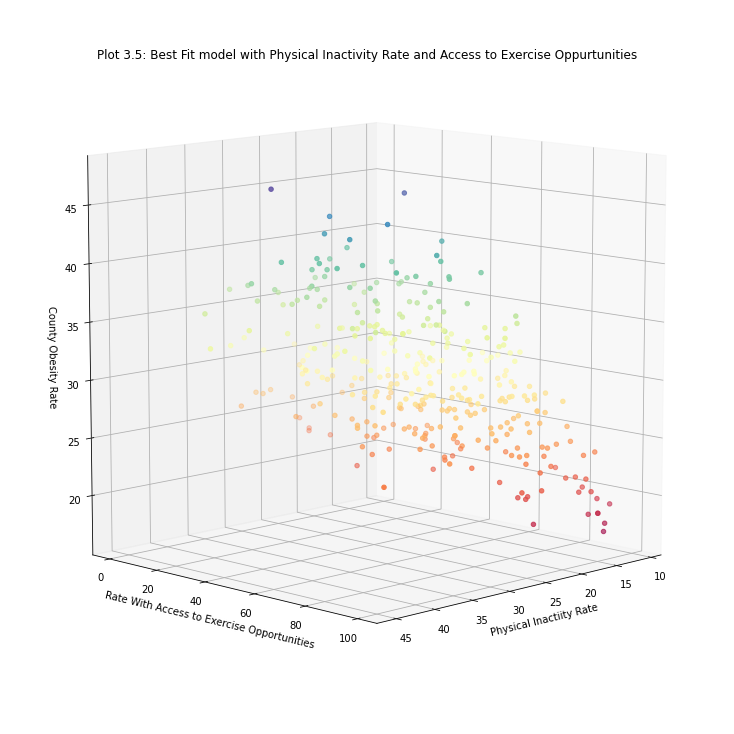

In [128]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(10, 10))
axes = Axes3D(fig, elev=10, azim=45)
axes.scatter(sample_df['% Physically Inactive'], sample_df['% With Access to Exercise Opportunities'], sample_df['% Adults with Obesity'], c=sample_df['% Adults with Obesity'], cmap=plt.cm.get_cmap("Spectral"))
plt.title("Plot 3.5: Best Fit model with Physical Inactivity Rate and Access to Exercise Oppurtunities")
axes.set_xlabel("Physical Inactiity Rate")
axes.set_ylabel("Rate With Access to Exercise Opportunities")
axes.set_zlabel("County Obesity Rate")
print("Equation: y = {:.2f} + {:.2f}x1 + {:.2f}x2".format(regr.intercept_, regr.coef_[0],
                                                         regr.coef_[1]))
plt.savefig("Plot 3-5.png")
plt.show()

In [116]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 24.398582222105713
Coefficients: 
 [-9.74494479e-03  4.28506176e-01 -1.53736784e-02 -3.62243783e-05
 -1.25249378e-02  3.23740021e-01]


In [117]:
X = sm.add_constant(X) 
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
predictions

0       35.812622
1       32.148942
2       32.965264
3       36.559309
4       34.761692
          ...    
2909    31.240540
2910    23.694880
2911    32.606743
2912    33.079300
2913    32.650130
Length: 2914, dtype: float64

In [118]:
print_model = model.summary()
print(print_model)

                              OLS Regression Results                             
Dep. Variable:     % Adults with Obesity   R-squared:                       0.358
Model:                               OLS   Adj. R-squared:                  0.357
Method:                    Least Squares   F-statistic:                     270.2
Date:                   Sat, 28 Nov 2020   Prob (F-statistic):          2.52e-275
Time:                           10:03:40   Log-Likelihood:                -8415.6
No. Observations:                   2914   AIC:                         1.685e+04
Df Residuals:                       2907   BIC:                         1.689e+04
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [ ]:
ax = df.plot.hist(bins=12, alpha=0.5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012DBCCD0F60>,
      dtype=object)

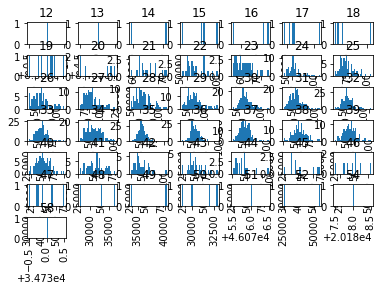

In [100]:
hist = omni_df.hist(column = 'Median Income', by ='% Adults with Obesity', bins=30)
hist